데이터 분포 시각화(2)

- 준비 작업

In [1]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb

In [2]:
# 데이터 불러오기
origin = load_data("employee_data_40")
origin.head()

[data] https://data.hossam.kr/data/lab06/employee_data_40.xlsx
[desc] 어느 기업의 직원 40명을 대상으로 성별과 결혼상태, 나이, 최종학력, 월수입을 조사한 가상의 데이터(인덱스, 메타데이터 없음)
[!] Cannot read metadata


,성별,결혼상태,나이,최종학력,월수입
0,남자,기혼,21,대학교,60
1,남자,기혼,22,대학원,100
2,남자,기혼,33,대학교,200
3,여자,미혼,33,대학교,120
4,남자,미혼,28,대학교,70


In [3]:
my_dpi = 200
font_path = "./NotoSansKR-Regular.ttf"
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
my_font_name = "Noto Sans KR"
my_theme = "dark"

sb.set_theme(style=my_theme)
plt.rcParams['font.family'] = my_font_name
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

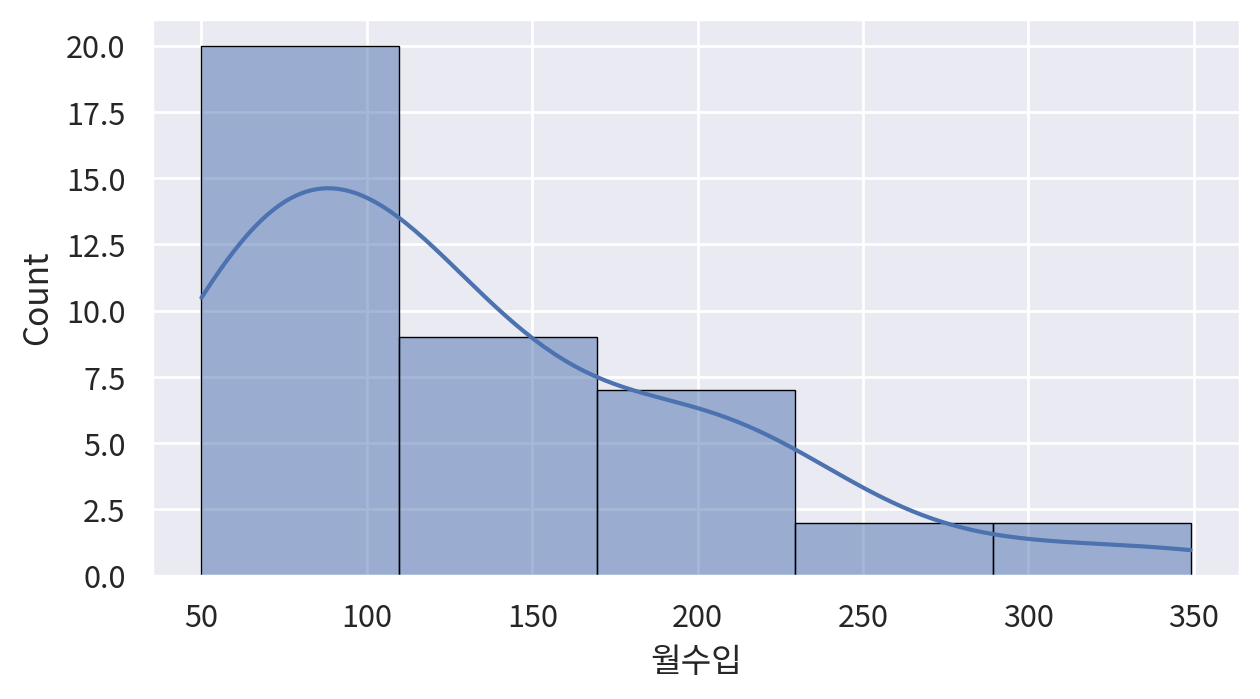

In [ ]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280             #그래프 가로 크기
height_px = 720             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.histplot(data=origin, x = "월수입", bins=5, edgecolor='black', linewidth=0.5, kde=True)

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
ax.grid(True)

# 4) 출력
plt.tight_layout()                      #여백 제거
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

바이올린 플롯
- 데이터의 분포 형태(치우침, 뾰족함, 꼬리 등)를 한눈에 보여주는 그래프
- 박스플롯에 커널 밀도추정 그래프를 결합한 형태
- 좌우 대칭의 바이올린 모양폭이 해당 구간의 데이터 밀도를 의미
- 중앙에는 보통 중앙값, 사분위수 등을 표시해 박스플롯 정보도 함께 제공
- 여러 그룹, 카테고리의 분포 비교에 효과적
- 데이터의 세부적 분포 구조(멀티 모달, 꼬리 부분 등)를 박스플롯보다 더 잘 표현

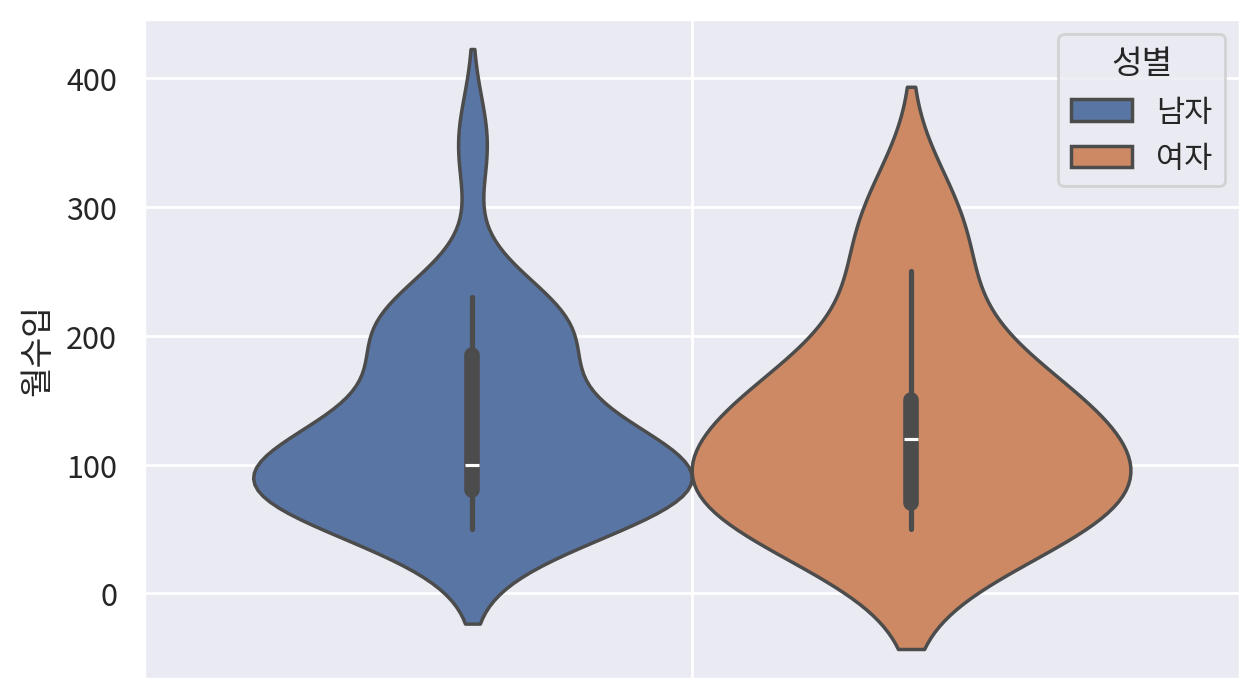

In [6]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280             #그래프 가로 크기
height_px = 720             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.violinplot(data=origin, y='월수입', hue='성별')

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
ax.grid(True)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

Strip plot
- 개별 데이터를 점 하나씩 그대로 표시하는 분포 시각화
- x축(또는 y축) 기준으로 값들이 가로, 세로로 흩뿌려진 형태
- 작은 표본이나 정확한 관측값 하나하나를 보여줄 때 효과적
- 범주형 그룹 간 원시 데이터 비교가 가능해 boxplot-violinplot보다 세밀한 확인 가능
- 여러 그룹 비교시, swarmplot과 함께 많이 사용됨(swarmplot은 겹침을 더 지능적으로 피함)

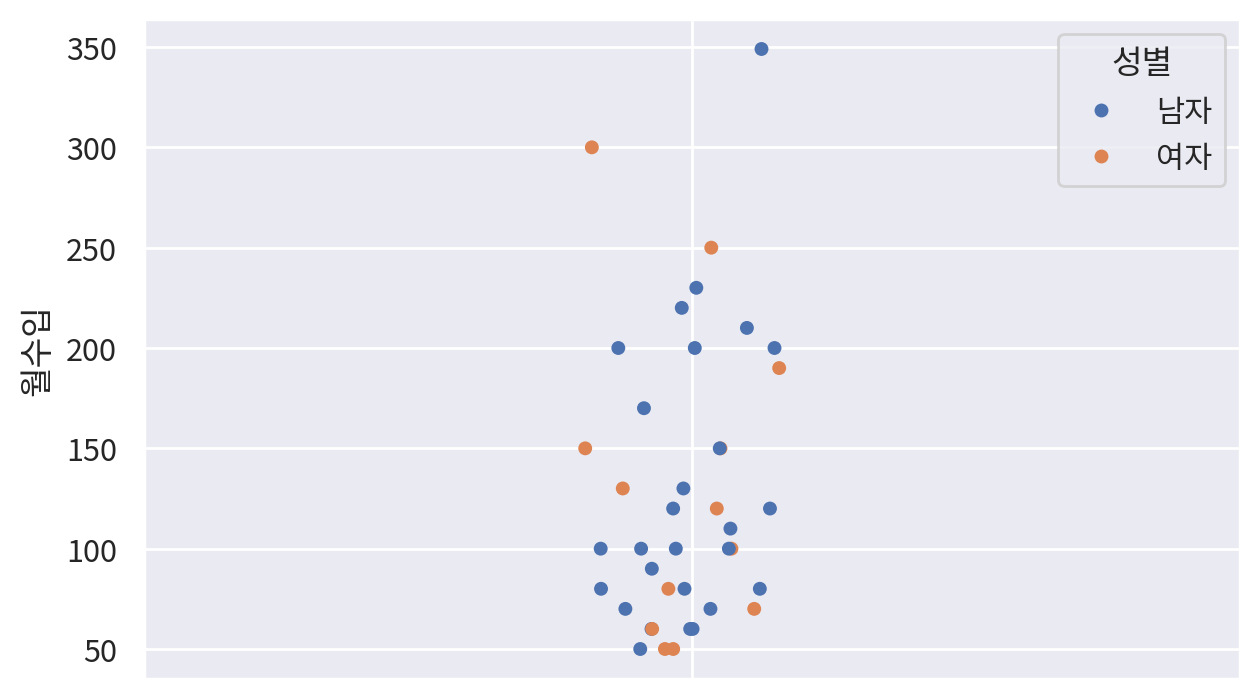

In [ ]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280             #그래프 가로 크기
height_px = 720             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.stripplot(data=origin, y='월수입', hue='성별')

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
ax.grid(True)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

Swarm Plot
- stripplot처럼 개별 데이터 점을 그대로 표시하는 분포 시각화
- 단, 데이터 점들이 서로 겹치지 않도록 자동으로 배치해주는 알고리즘 사용
    - 이 점을 제외하면 stripplot과 차이가 없다.
- 관측값 하나하나를 보면서도 밀도와 구조를 직관적으로 파악 가능
- 표본 수가 많아도 stripplot보다 가독성이 훨씬 좋음
- 범주형 그룹별 데이터의 실제 분포 형태를 비교할 때 유용

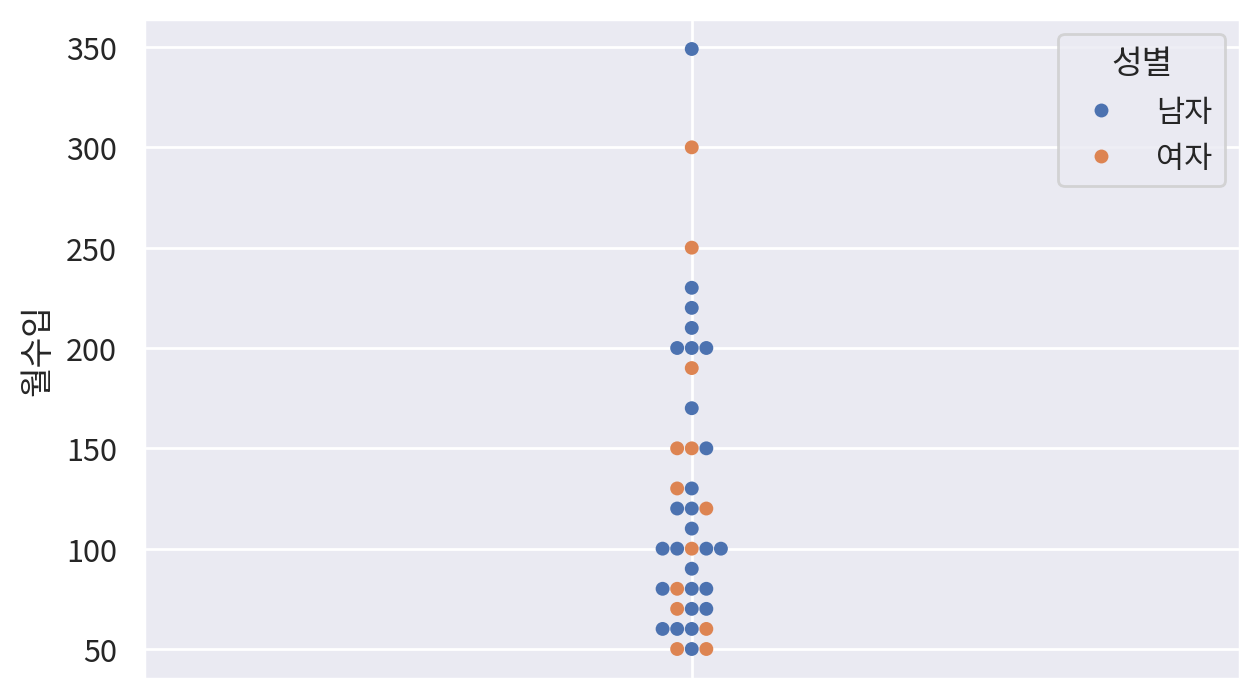

In [8]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 1280             #그래프 가로 크기
height_px = 720             #그래프 세로 크기
rows = 1                    #도화지의 행 수
cols = 1                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) 그래프 그리기 -> seaborn 사용
sb.swarmplot(data=origin, y='월수입', hue='성별')

# 3) 그래프 꾸미기 -> 도화지(ax)에 직접 적용
ax.grid(True)

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료